# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import pearsonr, linregress
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Storing latitude and longitude data
coord_data = []

# Storage for city names
city_names = []

# Define the latitude and longitude ranges
latitude_range = (-90, 90)
longitude_range = (-180, 180)

# Generate random set of coordinates
random_latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
random_longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
coord_data = zip(random_latitude, random_longitude)

# Find the nearest city for each coordinate pair
for coordinates in coord_data:
    nearest_city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    # Store unique cities only
    if nearest_city not in city_names:
        city_names.append(nearest_city)

# Confirm the total number of cities
print(f"Total number of cities: {len(city_names)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Base URL for API requests
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# List for storing weather data for each city
weather_data = []

# Log start of data retrieval
print("Starting Data Retrieval")
print("------------------------")

# Initiate counters
record_num = 1
group_num = 1

# Retrieve weather data for each city
for index, city in enumerate(city_names):
        
    # Create sets of 50 cities for logging
    if (index % 50 == 0 and index >= 50):
        group_num += 1
        record_num = 0

    # Endpoint URL for each city
    request_url = f"{base_url}q={city}&units=metric&appid={weather_api_key}"
    
    # Logging url, record, and set numbers
    print(f"Processing Record {record_num} of Set {group_num} | {city}")

    # Increase the record count
    record_num += 1

    # API request for each city
    try:
        # Retrieve and parse JSON data
        city_weather_info = (requests.get(request_url)).json()

        # Get relevant data from the JSON response
        latitude = city_weather_info["coord"]["lat"]
        longitude = city_weather_info['coord']['lon']
        max_temp = city_weather_info['main']['temp_max']
        humidity = city_weather_info['main']['humidity']
        cloud_coverage = city_weather_info['clouds']['all']
        wind_speed = city_weather_info['wind']['speed']
        country = city_weather_info['sys']['country']
        date = city_weather_info["dt"]

        # Store city info in weather_data list
        weather_data.append({"City": city, 
                          "Lat": latitude,
                          "Lng": longitude, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloud_coverage,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date
                         })
        
    # Skip city if any error occurs
    except:
        print("City not found. Skipping...")
        pass
    
    # Wait for 10 seconds after each API request to avoid server overload
    time.sleep(10)
    
# Signal end of data retrieval 
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | djambala
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | noumea
Processing Record 6 of Set 1 | al kharijah
Processing Record 7 of Set 1 | holualoa
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | dhidhdhoo
Processing Record 10 of Set 1 | fonadhoo
City not found. Skipping...
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | saipan
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | miyaly
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | bathurst
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 19 of Set 1 | chibougamau
Processing Record 20 of Set 1 | praia da vitoria
Processing Record 21 of Set 1 | san cristoba

KeyboardInterrupt: 

In [4]:
# Convert the city weather data to a Pandas DataFrame
weather_dataframe = pd.DataFrame(weather_data)

# Count data rows
weather_dataframe.count()

City          169
Lat           169
Lng           169
Max Temp      169
Humidity      169
Cloudiness    169
Wind Speed    169
Country       169
Date          169
dtype: int64

In [5]:
# Display sample data
weather_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,1.52,83,96,2.27,GS,1686275854
1,wailua homesteads,22.0669,-159.3780,27.44,69,20,5.14,US,1686275864
2,djambala,-2.5447,14.7533,19.93,92,100,1.70,CG,1686275875
3,port-aux-francais,-49.3500,70.2167,4.71,75,100,7.31,TF,1686275885
4,noumea,-22.2763,166.4572,25.99,99,2,5.23,NC,1686275895


In [7]:
# Save the City_Data to a csv file
weather_dataframe.to_csv("../output_data/cities.csv", index_label="City_ID")


In [9]:
# Load data from the saved file
weather_dataframe = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Show some sample data
weather_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.52,83,96,2.27,GS,1686275854
1,wailua homesteads,22.0669,-159.3780,27.44,69,20,5.14,US,1686275864
2,djambala,-2.5447,14.7533,19.93,92,100,1.70,CG,1686275875
3,port-aux-francais,-49.3500,70.2167,4.71,75,100,7.31,TF,1686275885
4,noumea,-22.2763,166.4572,25.99,99,2,5.23,NC,1686275895


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

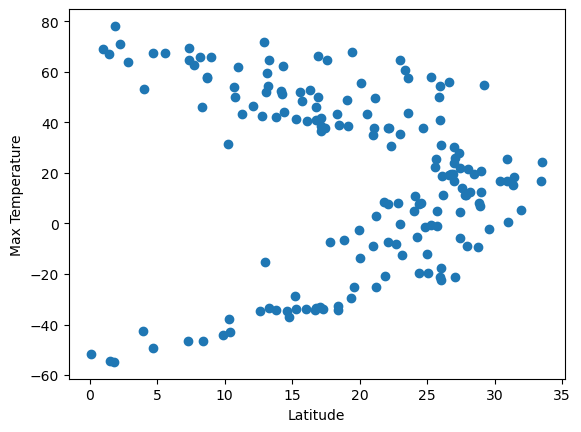

In [20]:
# Scatter plot of latitude vs. temperature
plt.scatter(weather_dataframe["Max Temp"], weather_dataframe["Lat"])

# Add plot labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

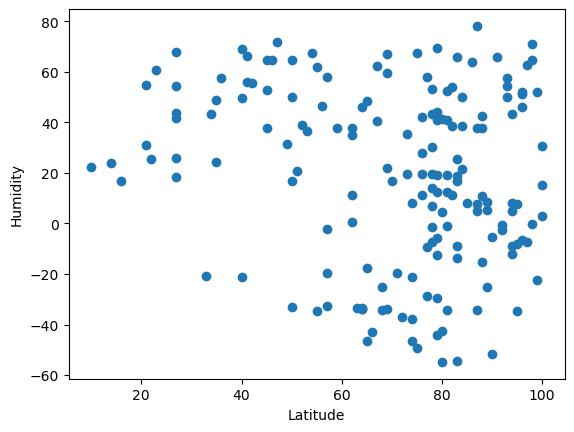

In [21]:
# Scatter plot of latitude vs. humidity
plt.scatter(weather_dataframe["Humidity"], weather_dataframe["Lat"])

# Add plot labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

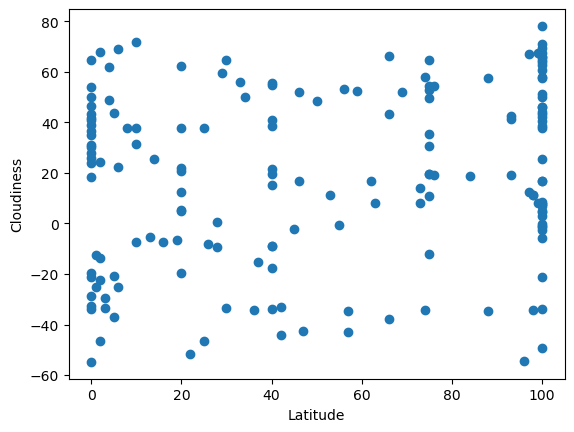

In [22]:
# Scatter plot of latitude vs. cloudiness
plt.scatter(weather_dataframe["Cloudiness"], weather_dataframe["Lat"])

# Add plot labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

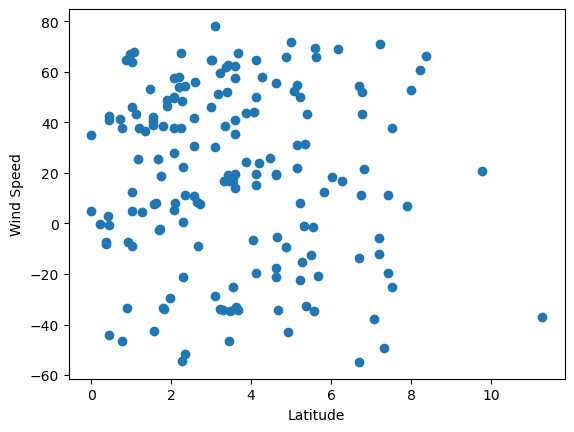

In [23]:
# Scatter plot of latitude vs. wind speed
plt.scatter(weather_dataframe["Wind Speed"], weather_dataframe["Lat"])

# Add plot labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Function for linear regression plots
def linear_regress(x_values, y_values, eqn_coordinates):
    correlation = pearsonr(x_values, y_values)
    print(f"The r-value is: {correlation[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x_values, y_values)
    plt.xlabel(f"{x_values.name}")
    plt.ylabel(f"{y_values.name}")


In [29]:
# DataFrame with Northern Hemisphere data
north_df = weather_dataframe.loc[weather_dataframe["Lat"] >= 0]

# Show some sample data
north_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,27.44,69,20,5.14,US,1686275864
5,al kharijah,25.4514,30.5464,30.93,22,14,1.17,EG,1686275906
6,holualoa,19.6228,-155.9522,26.91,78,75,4.63,US,1686275916
7,olonkinbyen,70.9221,-8.7187,2.22,98,100,7.22,SJ,1686275926
8,dhidhdhoo,6.8833,73.1000,28.90,78,100,7.90,MV,1686275936


In [30]:
# DataFrame with Southern Hemisphere data
south_df = weather_dataframe.loc[weather_dataframe["Lat"] < 0]

# Show some sample data
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.52,83,96,2.27,GS,1686275854
2,djambala,-2.5447,14.7533,19.93,92,100,1.70,CG,1686275875
3,port-aux-francais,-49.3500,70.2167,4.71,75,100,7.31,TF,1686275885
4,noumea,-22.2763,166.4572,25.99,99,2,5.23,NC,1686275895
14,bathurst,-33.4166,149.5806,13.31,63,30,0.89,AU,1686276008


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7573641352151613


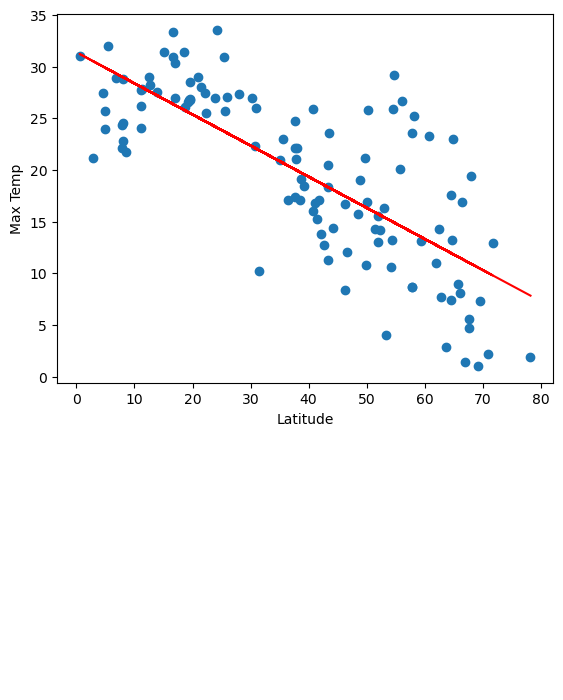

In [33]:
# Linear regression on Northern Hemisphere
linear_regress(north_df["Lat"].rename("Latitude"), north_df["Max Temp"], (10, -30))


The r-value is: 0.850301089375691


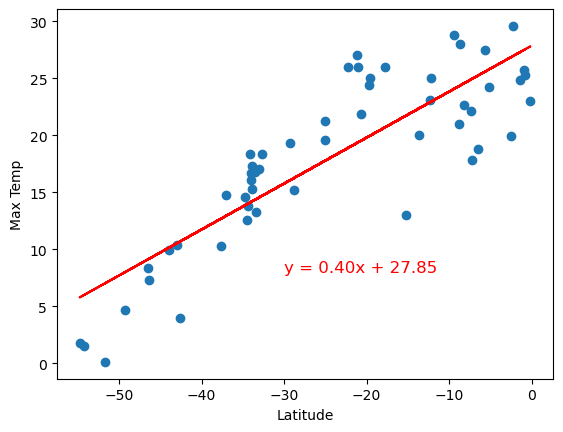

In [34]:
# Linear regression on Southern Hemisphere
linear_regress(south_df["Lat"].rename("Latitude"), south_df["Max Temp"], (-30, 8))

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.15610957579106333


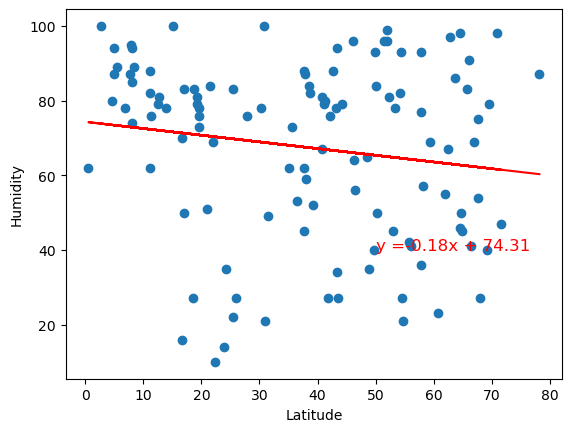

In [35]:
# Northern Hemisphere
linear_regress(north_df["Lat"].rename("Latitude"), north_df["Humidity"], (50, 40))

The r-value is: 0.27606424224544474


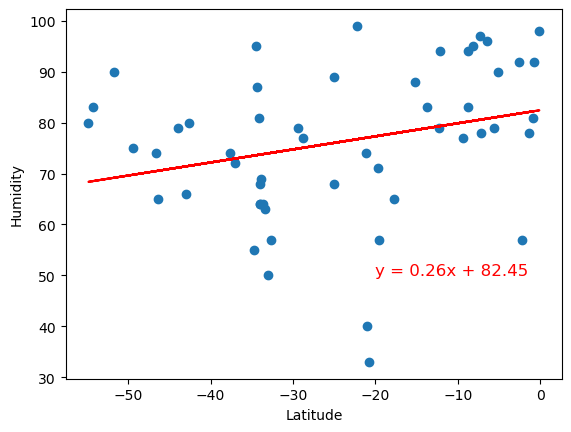

In [36]:
# Southern Hemisphere
linear_regress(south_df["Lat"].rename("Latitude"), south_df["Humidity"], (-20, 50))


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.006618393374685588


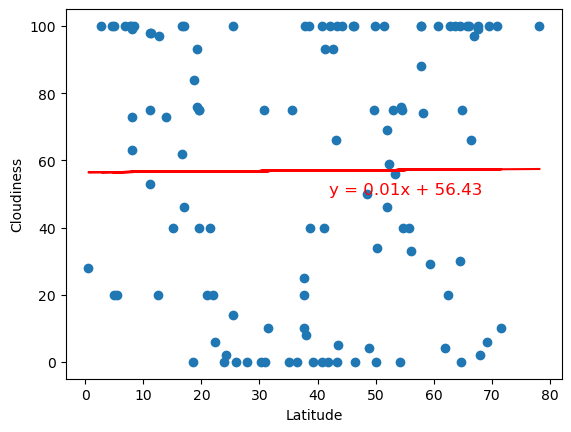

In [37]:
# Northern Hemisphere
linear_regress(north_df["Lat"].rename("Latitude"), north_df["Cloudiness"], (42, 50))

The r-value is: 0.09190326658502809


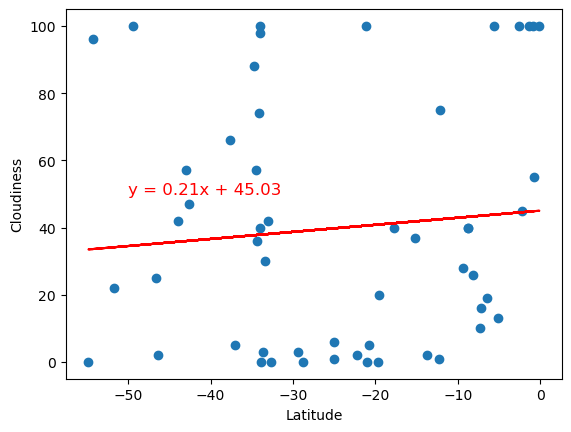

In [38]:
# Southern Hemisphere
linear_regress(south_df["Lat"].rename("Latitude"), south_df["Cloudiness"], (-50, 50))

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08237564353379545


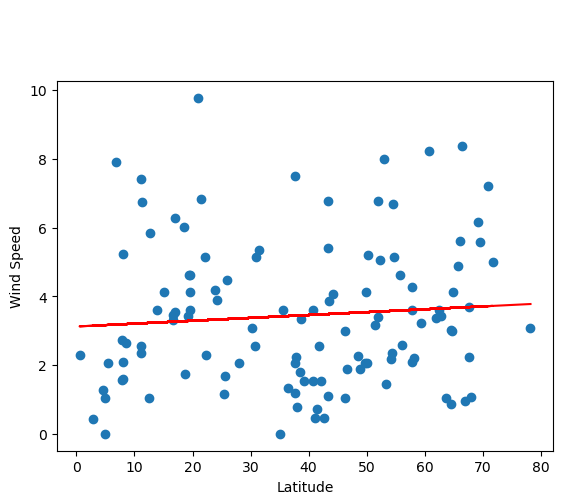

In [39]:
# Northern Hemisphere
linear_regress(north_df["Lat"].rename("Latitude"), north_df["Wind Speed"], (10, 12))


The r-value is: -0.0931811084152609


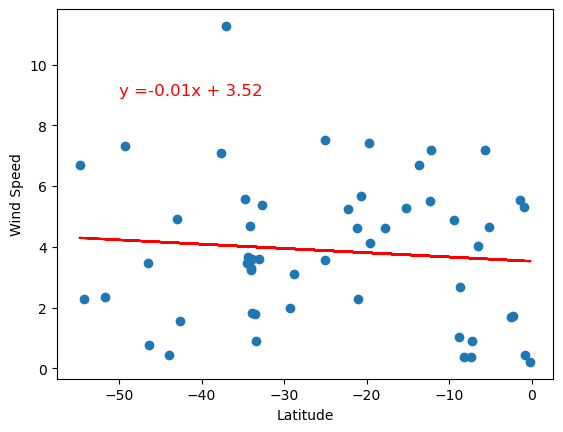

In [40]:
# Southern Hemisphere
linear_regress(south_df["Lat"].rename("Latitude"), south_df["Wind Speed"], (-50, 9))